# Linear Regression (การวิเคราะห์การถดถอยเชิงเส้น)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random

ใน workshop นี้เราจะใช้ linear regression ในการทำนายพฤติกรรมของข้อมูล

เริ่มต้นเราจะสร้างข้อมูลแบบสุ่มจากสมการเส้นตรง y = mx + c ดังตัวอย่างด้านล่าง


In [0]:
# กำหนดค่าเริ่มต้นให้ m=7 และ c=-10
m = 7
c = -10

# สร้าง list ว่างของ X_list เพื่อเก็บค่า x และ Y_list เพื่อเก็บค่า y
X_list = []
Y_list = []

# P_tuple สำหรับเก็บคุ๋อันดับ x และ y
P_tuple = []

# ต้องการสร้างคู่อันดับจำนวน 100 คู่
for i in range(0, 100):
  
  # สุ่มค่า x ในช่วง -5 ถึง 5
  x = random.uniform(-5,5)
  X_list.append(x)
  
  # คำนวนค่า y จากค่า x โดยเพิ่มค่า noise เข้าไปเพื่อให้ข้อมูลมี variance มากขึ้น
  # ปกติสมการเส้นตรงคือ y = (m*x) + c แต่กเราเพิ่มค่า random (rd) เข้าไปเพื่อให้ข้อมูลมีความไม่แน่นอนปนอยู่ด้วย
  rd = random.random()* 10 * random.uniform(-2, 2)
  y = (m*x) + c + rd
  Y_list.append(y)
  
  P_tuple.append((x,y))
  
  print("Generate x="+str(x)+ ", y="+str(y) +", noise="+str(rd))

Generate x=-2.131382635467296, y=-18.508362692130667, noise=6.411315756140403
Generate x=-1.0656439614736812, y=-30.229926225093216, noise=-12.770418494777443
Generate x=-4.755067443060861, y=-41.704087594308625, noise=1.5813845071174055
Generate x=-3.091571806240009, y=-26.43936404005428, noise=5.201638603625784
Generate x=-0.237879212870995, y=-20.18675487726405, noise=-8.521600387167084
Generate x=-0.2408730502380685, y=-25.416817408193047, noise=-13.73070605652657
Generate x=4.5424272905347465, y=15.99790279641605, noise=-5.799088237327177
Generate x=3.7397283416864084, y=16.82595719214858, noise=0.6478588003437183
Generate x=0.787508731069507, y=1.5649725657772446, noise=6.052411448290695
Generate x=1.5403357865300071, y=6.305711523521158, noise=5.5233610178111086
Generate x=2.331315218054474, y=7.641879632134504, noise=1.3226731057531858
Generate x=3.5131713535241236, y=15.471969716179547, noise=0.8797702415106812
Generate x=-3.6795184626907975, y=-42.08516847494793, noise=-6.328

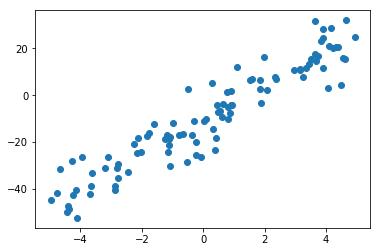

In [0]:
# ลอง plot ข้อมูลเพื่อดูการกระจายตัวของข้อมูล x และ y

# ถ้าต้องการวาดเส้นด้วยต้องกำหนดค่า line=True
def plot_graph(X_list,Y_list,m,c,linspace=[-5,5],n_data=100,line=False): 
  plt.scatter(X_list, Y_list)
  x = np.linspace(linspace[0],linspace[1],n_data)
  y = m*x+c
  if line: plt.plot(x, y, '-r')
  plt.show()
  
plot_graph(X_list,Y_list,m,c)

จะเห็นได้ว่าข้อมูลมีลักษณะของการกระจายตัวที่มีรูปแบบเป็นเส้นตรง ซึ่งเราแอบรู้แล้วว่ามันสร้างมาจาก สมการ y = 5x + 3 (จากที่เรากำหนด m=5 และ c=3) ไว้


แต่ในครั้งนี้เราจะสอนให้คอมพิวเตอร์(โมเดล) เรียนรู้ที่จะสร้างสมการเส้นตรงขึ้นมาเองจากข้อมูลคู่อันดับที่เราสร้างขึ้นมา กล่าวคือการที่โมเดลจะสร้างสมการเส้นตรงขึ้นมาได้นั้น 


เราจะต้องรู้ค่า m และ c โดยที่โมเดลจะต้องประมาณค่า m และ c ที่ทำให้การวางตัวของจุดต่างๆเป็นไปในแนวเดียวกันกับเส้นตรงนั้นมากที่สุด

## สร้าง Hypothesis Function

1. กำหนด Hypothesis Function หรือโมเดลของเราขึ้นมาดังนี้

> h($\Theta$) = $\Theta_{1}$x + $\Theta_{0}$

ซึ่งจริงๆแล้ว h($\Theta$) ก็คือค่า y 

$\Theta_{1}$ คือค่า m 

$\Theta_{0}$ คือค่า c นั่นเอง

มันก็คือสมการเส้นตรงนั่นเองเพียงแต่เขียนให้ดูน่ากลัวเท่านั้นเอง 5555

In [0]:
# TODO:1-1 จงสร้างฟังก์ชันที่คืนค่า y ของ hypothesis function

def hypothesis(theta0, theta1, x):
  ### CODE HERE ############
  
	return theta0 + (theta1*x) 

  ##########################

In [0]:
### Test code for TODO:1 ###

test1 = hypothesis(4.7268, -3.6136, 8.3689)
print(test1)

#####################################
### ผลลัพธ์ที่ได้ควรจะเป็น -25.51505704 ###
#####################################

-25.51505704


2. ในขั้นนี้เราจะกำหนดค่าเริ่มต้นให้กับ $\Theta_{1}$ (ค่า m) และ $\Theta_{0}$ (ค่า c) แบบสุ่มให้กับ hypothesis function ของเราเพื่อให้โมเดลมีจุดเริ่มต้นที่จะเรียนรู้

Theta 0 is : 0.07781256918369428
Theta 1 is : 0.8060984212167914


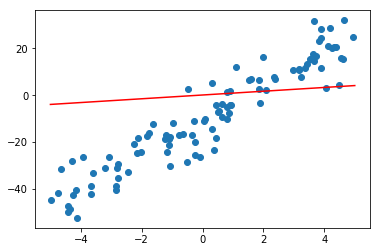

In [0]:
# TODO:1-2 กำหนดค่าเริ่มต้นให้กับ theta0 และ theta1 แบบสุ่ม

### CODE HERE #######################

theta0 = np.random.rand()
theta1 = np.random.rand()

#####################################

print("Theta 0 is :",theta0)
print("Theta 1 is :",theta1)

plot_graph(X_list,Y_list,theta1,theta0,line=True)

#################################################
### ผลลัพธ์ที่ได้อาจแตกต่างกันเนื่องจากผลจากการ random ###
### แต่ต้องได้กราฟที่มัลักษณะคล้ายกับรูปด้านล่าง ############         
#################################################

ตัวอย่างผลลัพธ์จากการ plot (จะได้ออกมาหน้าตาคล้ายๆกัน อาจจะไม่เหมือนเป๊ะเพราะเป็นค่าที่ได้จากการ random)

<img src='https://github.com/Mixelon-tera/Workshop6_LinearRegression/raw/master/graph_ws6.png' width=400 />

จะเห็นว่าเมื่อค่า theta0 และ theta1 ที่ได้จากการสุ่มทำให้โมเดลสร้างสมการเส้นตรงแบบมั่วๆออกมาได้

## สร้าง Loss Function

การทำให้โมเดลสามารถเรียนรู้ที่จะแก้ไขค่า $\Theta_{1}$ และ $\Theta_{0}$ เพื่อปรับปรุงให้เส้นตรงมีทิศทางไปในแนวเดียวกันกับข้อมูล จึงมีความจำเป็นที่จะต้องกำหนด loss function หรือ cost function ขึ้นมา ซึ่งค่าที่ได้จากการคำนวน loss function จะเป็นตัวบ่งชี้ว่าสมการเส้นตรงที่โมเดลสร้างขึ้นมานั้นดีหรือห่วยมากน้อยเพียงใด โดยถ้าหากว่าเส้นตรงที่สร้างขึ้นมานั้นมีระยะห่างจากคู่จุดใดๆอยู่มากแสดงว่าไม่ดี ค่า loss ก็จะสูงในทางตรงกันข้ามหากมีระยะห่างน้อยแสดงว่าดี ค่า loss ก็จะมีค่าต่ำ

สำหรับ linear regression นั้น loss function ที่มักนิยมใช้คือ MSE (Mean square error) ซึ่งมีสมการดังนี้

> MSE = $\frac{1}{n}\sum_{t=1}^{n}(y - \tilde{y})^2$

ซึ่ง y คือค่าจริง, $\tilde{y}$ คือ ค่าที่ได้จากการทำนาย, และ n คือจำนวนข้อมูลทั้งหมด

ในขั้นตอนที่ 2 เราได้ plot ข้อมูล x,y และ สมการ x,y ที่ได้จากการสุ่มค่า $\Theta_{1}$ และ $\Theta_{0}$ เราสามารถคำนวน error จากสมการข้างต้นได้ดังนี้

In [0]:
# TODO:2-1 สร้าง loss function

def cal_MSE(y, y_pred):
  
  ### CODE HERE ##############
  
  mse = 0
  for i in range(len(y)):
    diff = y[i] - y_pred[i]
    sqrt = diff ** 2
    mse += sqrt
  
  return (mse * 1.0) / len(y)

  ############################

In [0]:
### Test code for TODO:2-1 ###

y3 = [1.50, -2.73, 8.62, -12.14, 4.78]
y3_pred = [1.73, 1.68, -3.57, -10.92, 3.68]

td3 = cal_MSE(y3,y3_pred)
print(td3)

#####################################
### ผลลัพธ์ที่ได้ควรจะเป็น 34.1591 #######
#####################################

34.1591


คำนวนค่า error เฉลี่ยจาก loss function ดังกล่าวจากข้อมูล X_list และ Y_list ที่เราสร้างขึ้นมาก่อนหน้านี้

In [0]:
# TODO:2-2 คำนวนค่า loss ของข้อมูลทั้งหมดใน X_list และ Y_list

total_loss = 0 

### CODE HERE #######################################

for x,y in zip(X_list,Y_list):
  loss = cal_MSE([y], [hypothesis(theta0,theta1,x)])
  total_loss += loss
  
  print("x=",x,"y=",y,"loss=",loss)
  
#####################################################
  
print("\nTotal loss =", total_loss)

x= -2.131382635467296 y= -18.508362692130667 loss= 284.53182208999505
x= -1.0656439614736812 y= -30.229926225093216 loss= 867.2273970198696
x= -4.755067443060861 y= -41.704087594308625 loss= 1440.1150497165486
x= -3.091571806240009 y= -26.43936404005428 loss= 577.203770220321
x= -0.237879212870995 y= -20.18675487726405 loss= 402.9178373300323
x= -0.2408730502380685 y= -25.416817408193047 loss= 640.113407362419
x= 4.5424272905347465 y= 15.99790279641605 loss= 150.26951696383742
x= 3.7397283416864084 y= 16.82595719214858 loss= 188.61054697239405
x= 0.787508731069507 y= 1.5649725657772446 loss= 0.7265012926563581
x= 1.5403357865300071 y= 6.305711523521158 loss= 24.86255651490718
x= 2.331315218054474 y= 7.641879632134504 loss= 32.316923142627914
x= 3.5131713535241236 y= 15.471969716179547 loss= 157.80874988744512
x= -3.6795184626907975 y= -42.08516847494793 loss= 1536.3990878518562
x= 4.235969462054344 y= 19.95084980459063 loss= 270.8798831638914
x= -4.420070214438451 y= -47.20707454568932

## การคำนวน Derivatives

ค่า loss ที่ได้จาก loss function เป็นค่าที่บอกถึงความผิดพลาดของโมเดลในการประมาณค่าของเส้นตรง เราจะนำค่า loss นี้มาบอกค่าความผิดพลาดของโมเดลปัจจุบัน และควรปรับโมเดลไปในทิศทางใด ซึงสิ่งที่โมเดลจะต้องปรับเราจะเรียกว่า weight ซึ่งในที่นี้คือค่า $\theta_{0}$ และ $\theta_{1}$ ที่ปรากฏอยู่ใน hypothesis function

ในขั้นตอนของการปรับ weight โมเดลจะนำค่า loss มาคำนวนสิ่งที่เรียกว่า gradient ซึ่งเป็นค่าที่ได้จากการคำนวนหาอนุพันธ์จากค่า loss มาปรับค่า $\theta_{0}$ และ $\theta_{1}$

<img src='https://miro.medium.com/max/1400/1*91DQMNKmNIdncqx6FsB4Iw.png'  width='500px'/>

เป้าหมายของเราคือ จะต้องใช้ gradient ปรับ weight เพื่อให้ค่า loss ของ model มีค่าต่ำที่สุดเท่าที่จะเป็นไปได้

In [0]:
# TODO:3 คำนวนค่า derivatives ของ hypothesis function เทียบกับ theta0 และ theta1
# ดังนัั้นฟังก์ชันนี้จะคืนค่า 2 ค่านั่นคือค่าที่ได้จากการดิฟด้วย theta0 คือ dtheta0 และ theta1 คือ dtheta1
# กำหนดให้ theta1 คือ m และ theta0 คือ c ในสมการเส้นตรง

def derivatives(theta0, theta1, X_list, Y_list):
	dtheta0 = 0
	dtheta1 = 0
  
  ### CODE HERE #########################################
  
	for (xi, yi) in zip(X_list, Y_list):
		dtheta0 += hypothesis(theta0, theta1, xi) - yi
		dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

	dtheta0 /= len(X_list)
	dtheta1 /= len(X_list)

  #######################################################
  
	return dtheta0, dtheta1

In [0]:
### Test code for TODO:3 ###

dt30 , dt31 = derivatives(3.24, 5.66, [1.45, -2.45, 5.38, -5.49], [10.46, -4.25, -5.83, 13.87])

print(dt30, dt31)

######################################################
### ผลลัพธ์ที่ได้ควรจะเป็น -1.89315 และ 114.6570925 #######
######################################################

-1.8931500000000003 114.6570925


หลังจากเราคำนวน gradient ของ theta1 และ theta0 ได้แล้วขั้นตอนต่อไปคือการปรับค่า theta1 และ theta0 ใน hypothesis function (ปรับ weight) เพื่อให้เส้นตรงของเราค่อยๆปรับไปตามข้อมูล

In [0]:
# TODO:4 สร้างฟังก์ชันสำหรับปรับ weight (ค่า theta1 และ theta0) 

def updateParameters(theta0, theta1, X_list, Y_list, alpha):
  
  ### CODE HERE ################################################
  
  # Step1: คำนวนค่า derivartive ของ theta1 และ theta0 
	dtheta0, dtheta1 = derivatives(theta0, theta1, X_list, Y_list)
  # Step2: ปรับค่า theta1 และ theta0 ไปตามค่า alpha และค่า gradient 
	theta0 = theta0 - (alpha * dtheta0)
	theta1 = theta1 - (alpha * dtheta1)
  
  ##############################################################
  
	return theta0, theta1

In [0]:
### Test code for TODO:4 ###

tt40, tt41 = updateParameters(3.24, 5.66, [1.45, -2.45, 5.38, -5.49], [10.46, -4.25, -5.83, 13.87], 0.1)

print(tt40,tt41)

######################################################################
### ผลลัพธ์ที่ได้ควรจะเป็น 3.4293150000000003 และ -5.805709250000001 #######
######################################################################

3.4293150000000003 -5.805709250000001


In [0]:
# TODO:5 สร้างฟังก์ชัน LinearRegression โดยรับค่า X_list และ Y_list 
# โดยคำนวนหาค่า theta1 และ theta0 ที่ทำให้เส้นตรงวางตัวไปในแนวเดียวกันกับข้อมูล 
# กล่าวคือปรับจนกว่าจะได้ค่า loss ต่ำสุดเท่าที่เป็นไปได้ => กำหนดให้มีการปรับ weight จำนวน epoch ครั้ง
# จากนั้นพล๊อตกราฟแสดงข้อมูลและเส้นตรง (เรียกฟังก์ชัน plot_graph) ในทุกๆ step ของการปรับ weight

def LinearRegression(X_list, Y_list, epoch, linspace=[-5,5], n_data=100,alpha=0.0002):
  ### CODE HERE #############################################################
  
  # Step1: กำหนดค่าเริ่มต้นให้กับ theta1 และ theta0 แบบสุ่ม (ใช้ฟังก์ชัน random)
	theta0 = np.random.rand()
	theta1 = np.random.rand()
  
  # Step2: วนลูปเพื่อใช้ในการปรับ weight ให้กับ model
	for i in range(0, epoch):
    # Step3: ในทุกๆ 100 step ให้ plot graph เพื่อแสดงข้อมูลและเส้นตรงปัจจุบัน (อย่าลืมกำหนด line=True)
		if i % 100 == 0:
			plot_graph(X_list,Y_list,theta1,theta0,linspace=linspace, n_data=n_data, line=True)
    # Step4: ปรับ weight ให้กับค่า theta1 และ theta0  
		theta0, theta1 = updateParameters(theta0, theta1, X_list, Y_list, alpha)
  
	return theta1,theta0

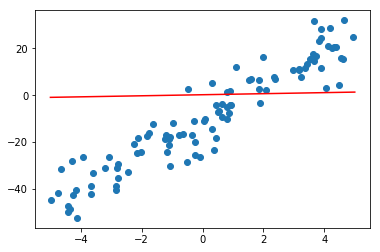

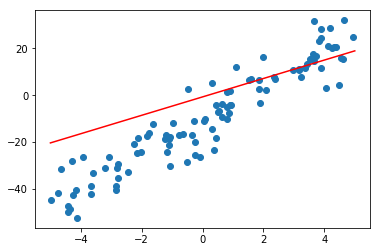

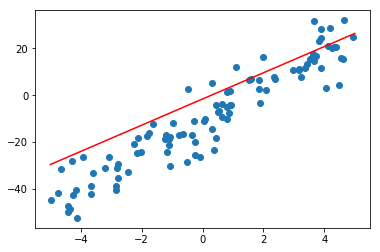

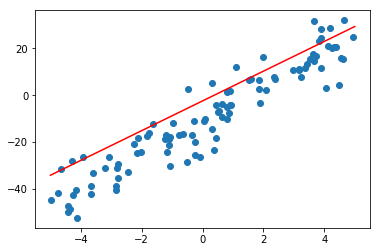

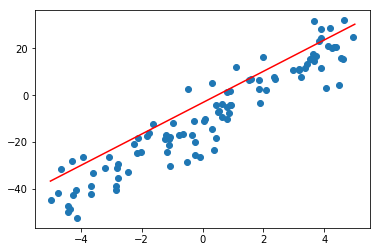

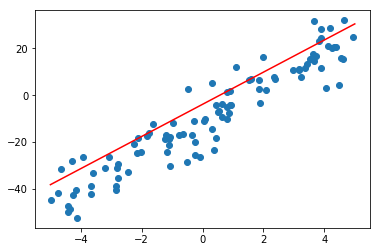

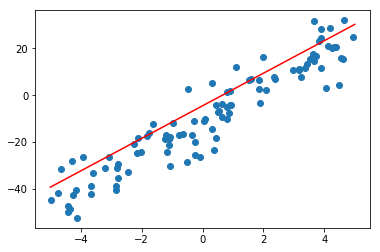

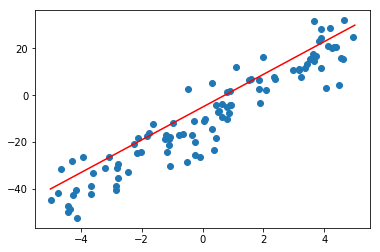

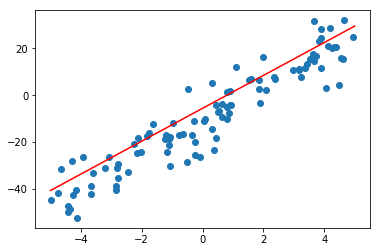

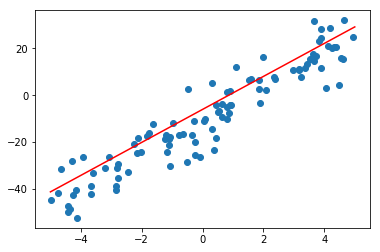

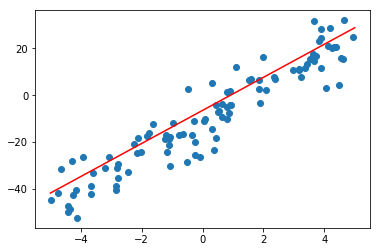

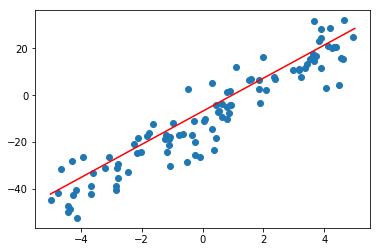

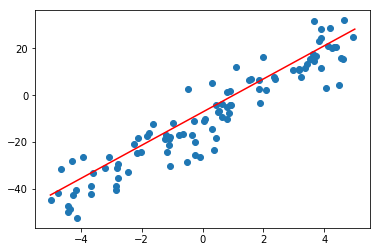

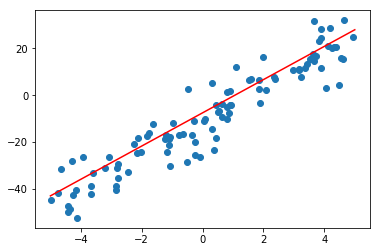

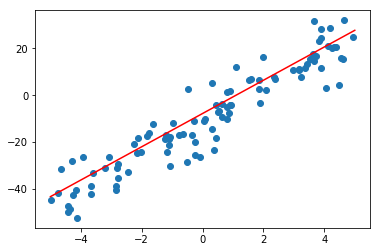

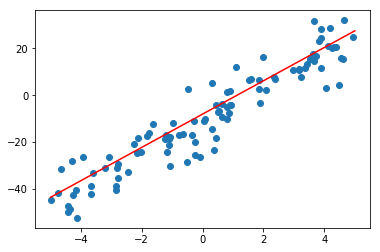

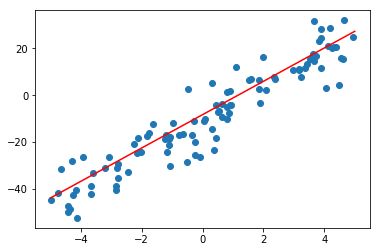

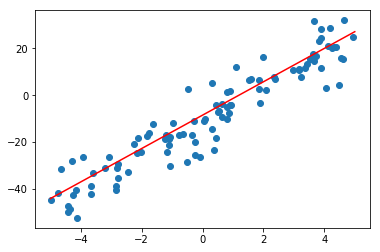

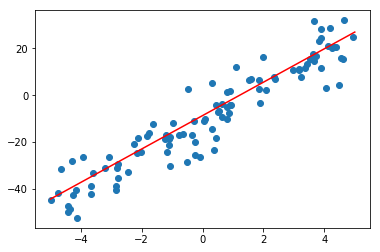

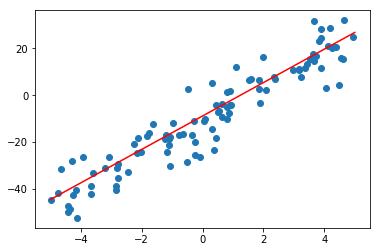

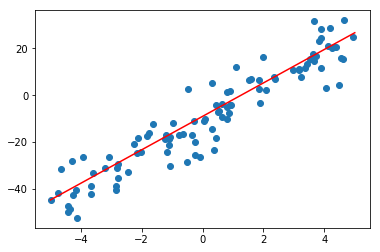

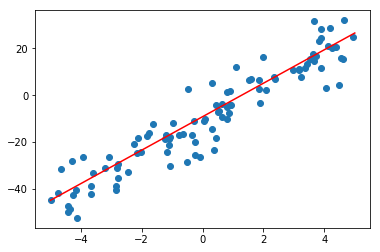

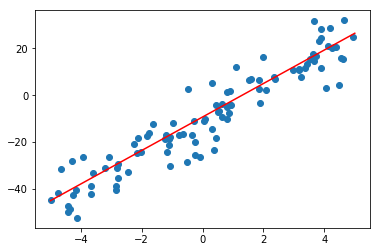

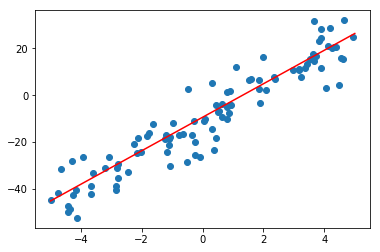

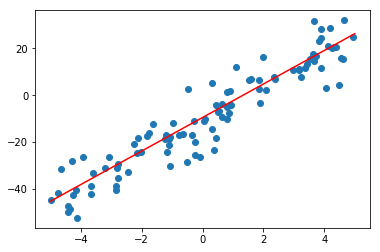

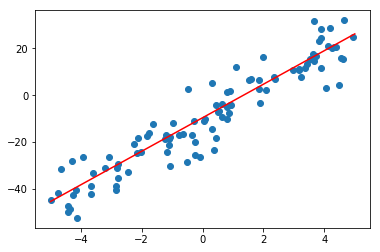

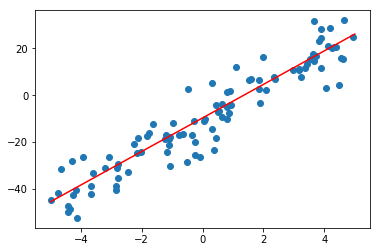

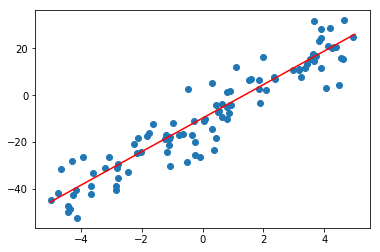

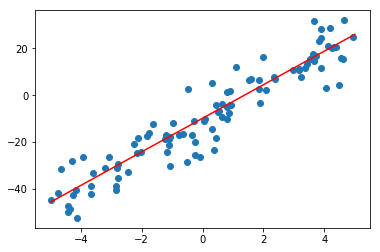

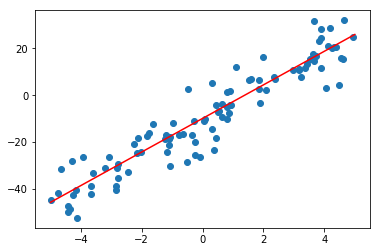

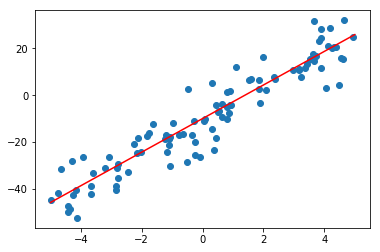

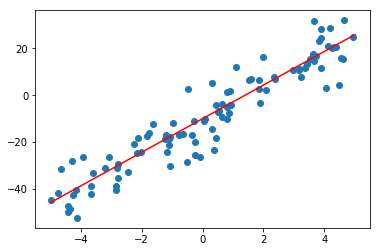

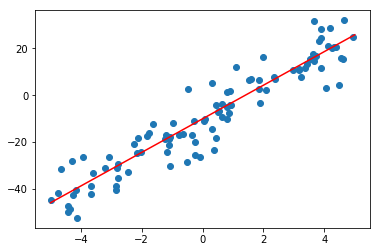

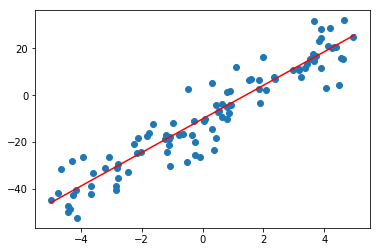

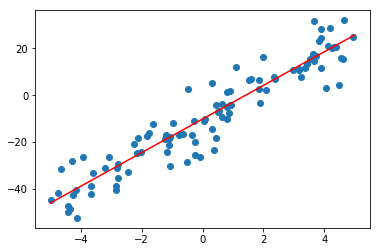

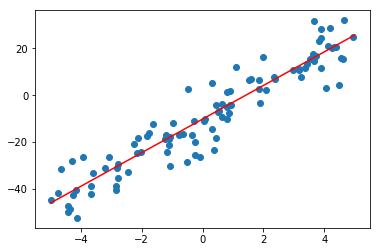

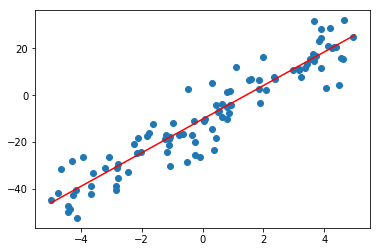

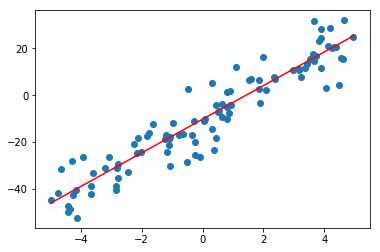

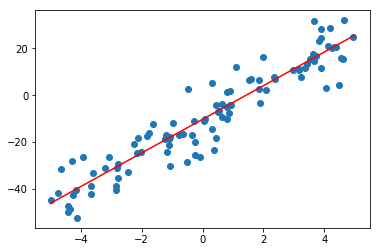

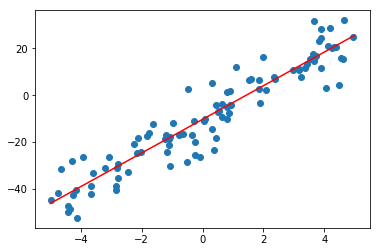

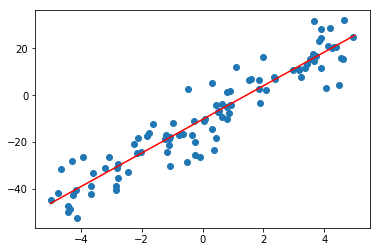

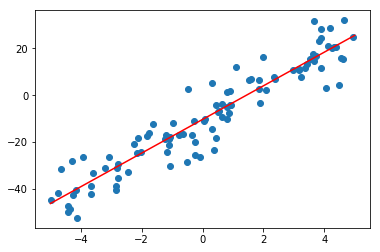

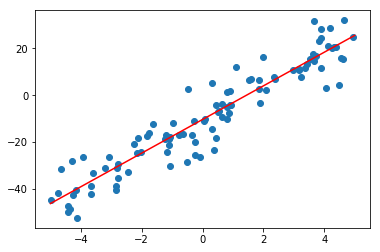

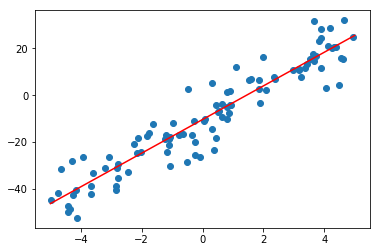

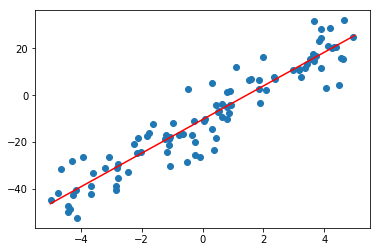

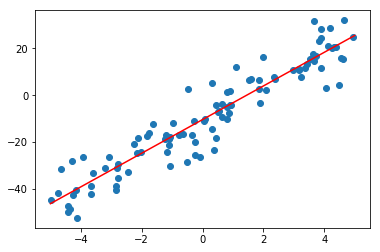

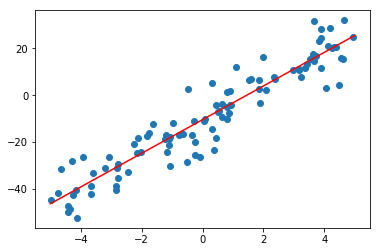

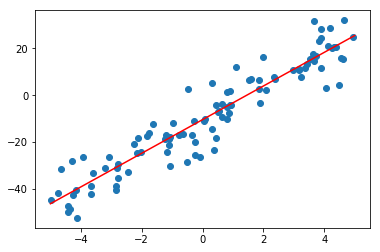

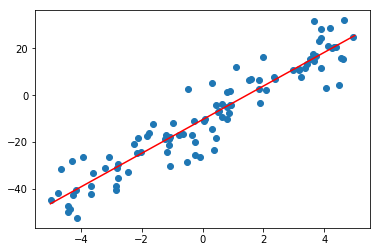

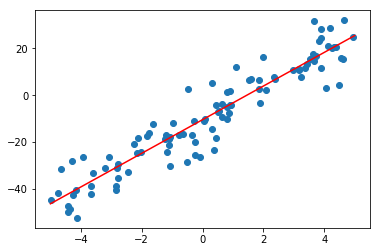

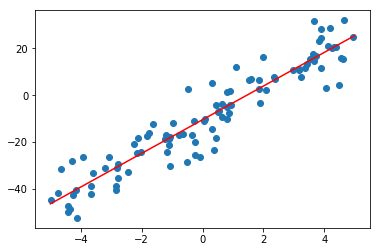

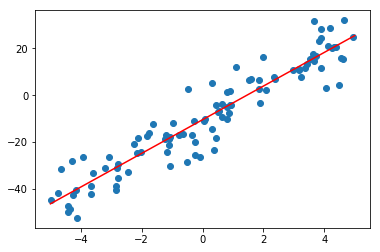

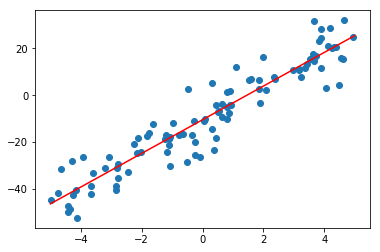

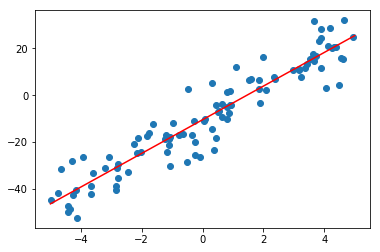

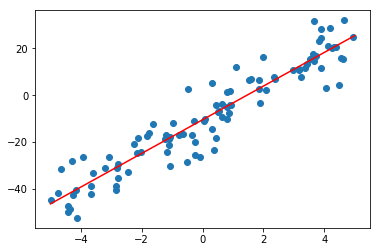

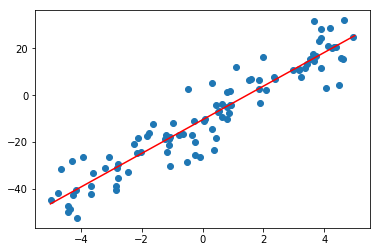

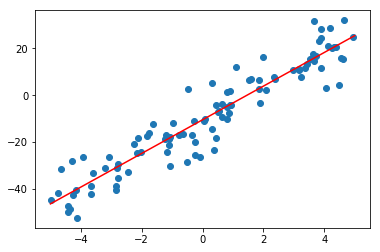

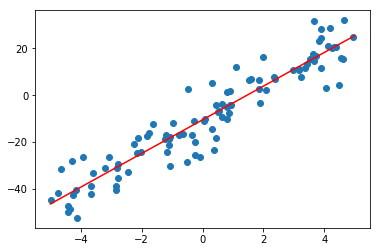

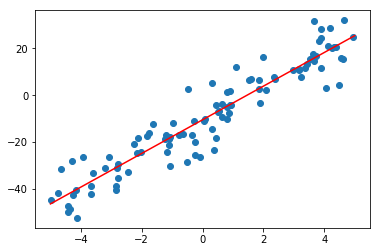

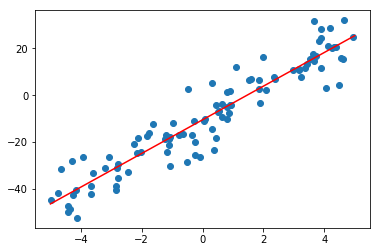

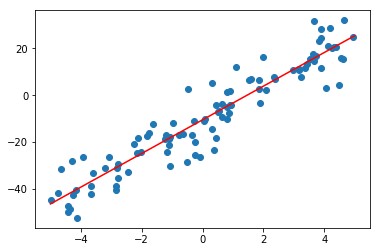

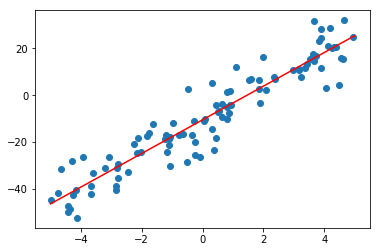

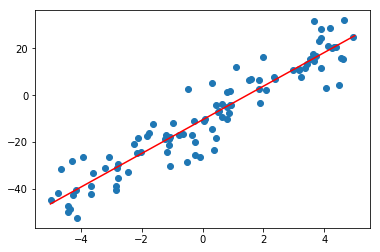

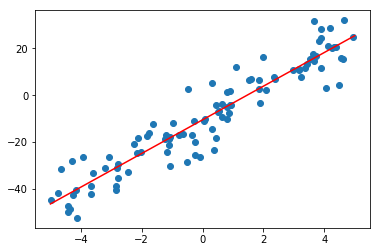

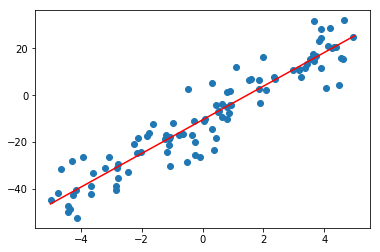

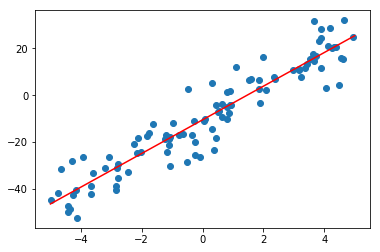

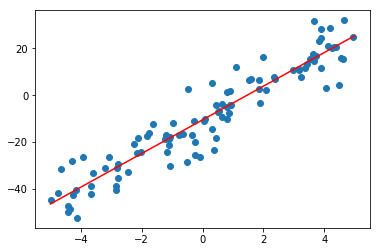

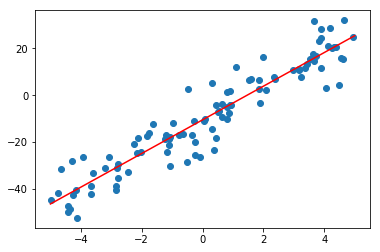

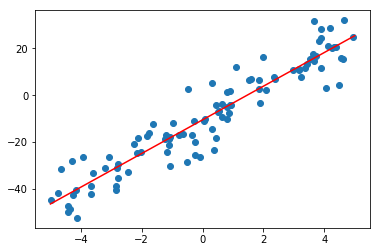

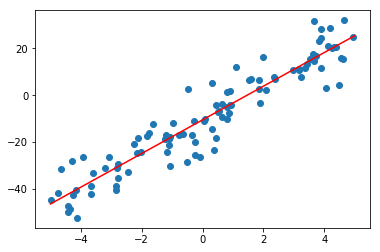

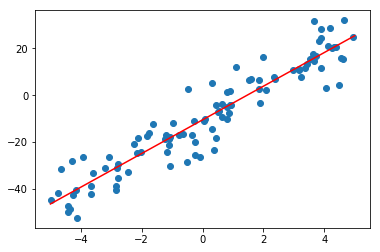

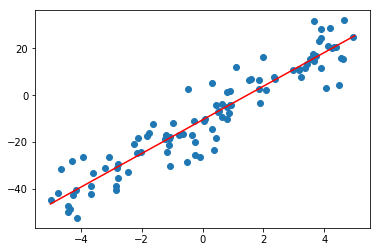

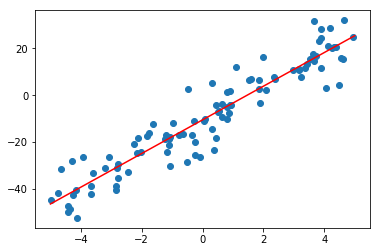

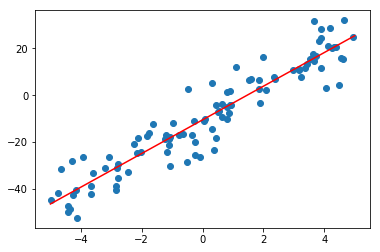

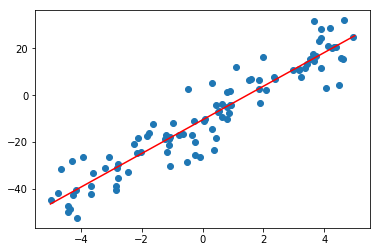

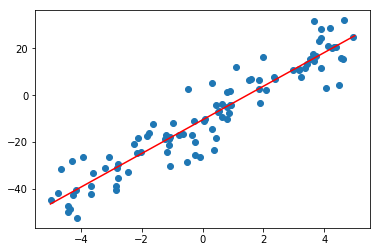

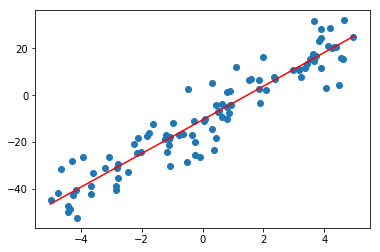

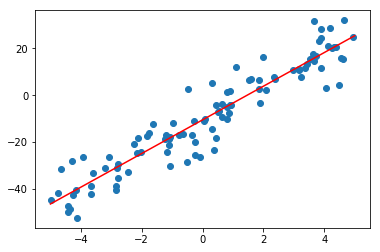

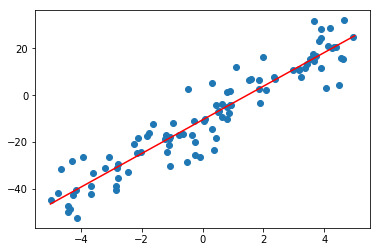

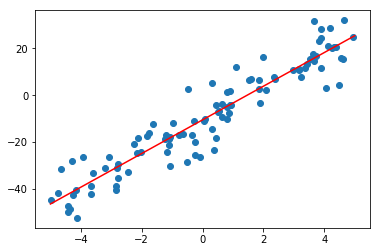

In [0]:
### Test code for TODO:5 ###
### ไปเรียก TA มาตรวจ #######

new_m, new_c = LinearRegression(X_list, Y_list, epoch=8000, alpha=0.001)

ทดลอง print ค่า theta1 และ theta0 ออกมาดูสิจะเห็นได้ว่าค่าที่ได้มีค่าเข้าใกล้ค่าที่เรากำหนดไว้ตอนต้น


In [0]:
print(new_m, new_c)

7.193658390762156 -10.539608040739614


## ทดลองทำนายผลกันเถอะ

หลังจากที่เราสร้างเส้นตรงที่เข้ากับข้อมูลที่เราสร้างขึ้นมาได้แล้ว ในหัวข้อนี้เราจะใช้สมการเส้นตรงมาในการทำนายผลลัพธ์ 

โดยสุ่มหยิบข้อมูลจาก X_list เพื่อมาทำนายผลว่าตรงหรือแตกต่างจากผลลัพธ์ใน Y_list มากน้อยเพียงใด

In [0]:
# สุ่มหยิบข้อมูลจาก X_list

index = random.randint(0,len(X_list)-1)
x_rand = X_list[index]

# ใช้สมการเส้นตรงที่เราสร้างขึ้นมาทำนายผลค่า Y

pred = hypothesis(new_c, new_m, x_rand)

print("x_rand :",x_rand,"pred :",pred," Y_real :", Y_list[index])

x_rand : -2.2536359033378672 pred : -26.751494866508914  Y_real : -20.725932044891543


## (Optional) ทำนายข้อมูลเงินเดือนจากจำนวนปีที่ทำงาน

In [0]:
# โหลดข้อมูล Salary_Data.csv [cr.Kaggle] 

! wget 

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [0]:
# แปลงข้อมูลใน csv ให้ Year_list เก็บข้อมูลจำนวนปีที่ทำงาน และ Salary_list เก็บข้อมูลเงินเดือน

import pandas as pd

Year_list = []
Salary_list = []

df = pd.read_csv("Salary_Data.csv")

for i in range(len(df)):
  Year_list.append(df['YearsExperience'][i])
  Salary_list.append(df['Salary'][i])

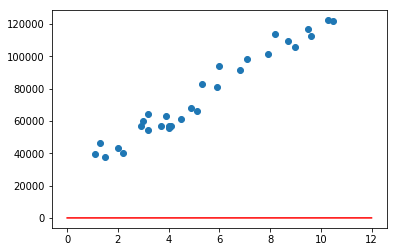

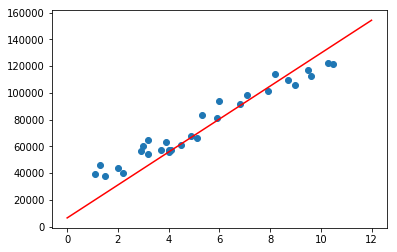

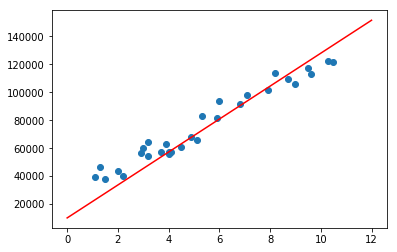

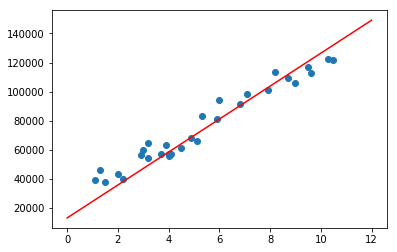

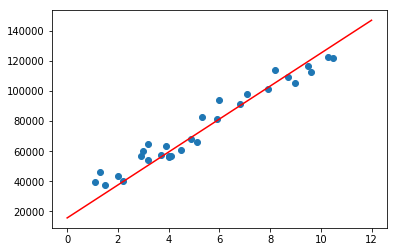

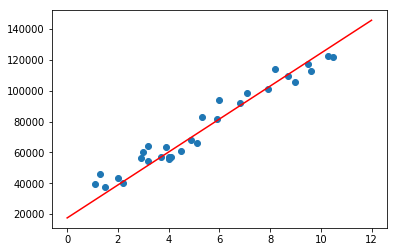

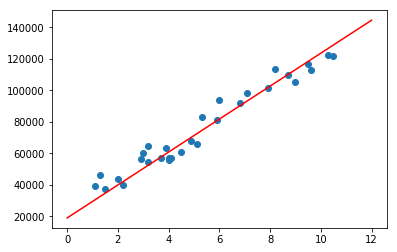

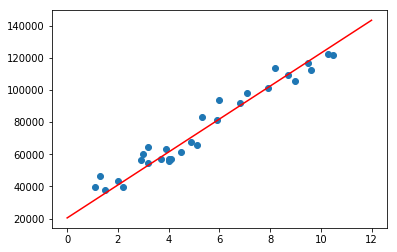

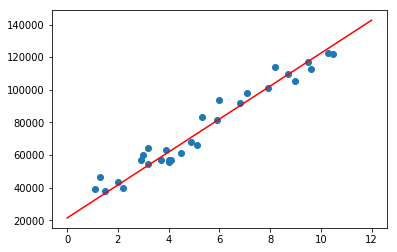

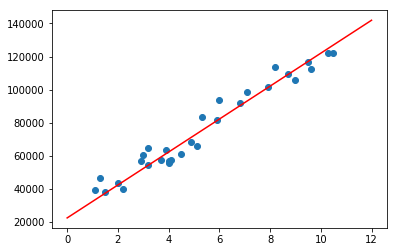

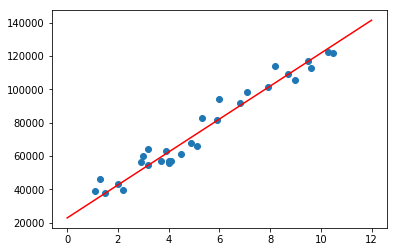

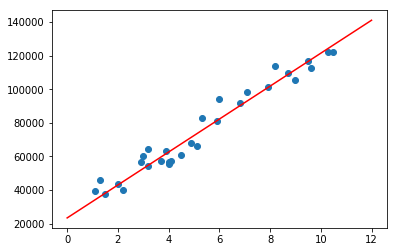

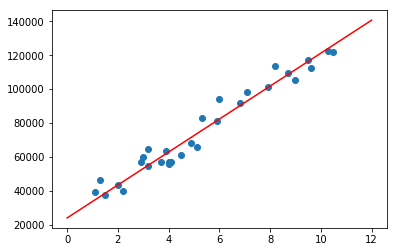

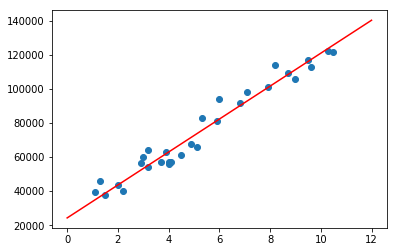

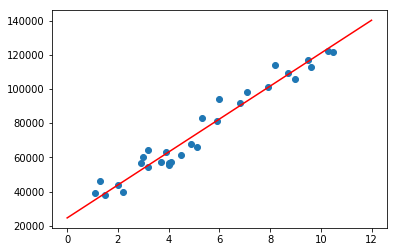

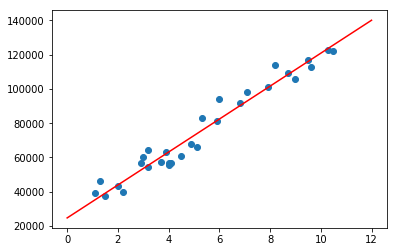

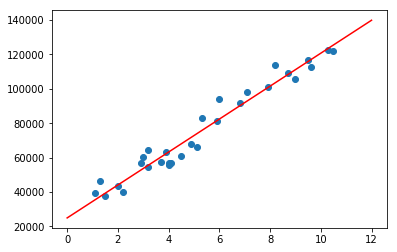

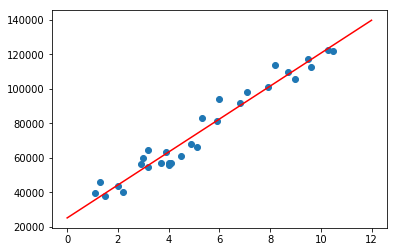

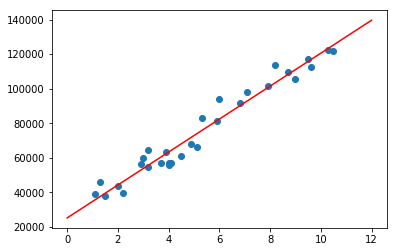

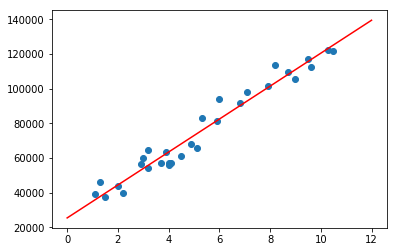

In [0]:
# Fit ข้อมูลเข้ากับสมการเส้นตรง
my_m, my_c = LinearRegression(Year_list, Salary_list, linspace=[0,12],n_data=len(df),epoch=2000, alpha=0.01)

In [0]:
print(my_m, my_c)

9501.241629543452 25446.64255181966


## ทดลองทำนายเงินเดือนจากจำนวนปีที่ทำงาน

In [0]:
# สุ่มหยิบข้อมูลจาก X_list

my_index = random.randint(0,len(Year_list)-1)
my_x_rand = Year_list[my_index]

# ใช้สมการเส้นตรงที่เราสร้างขึ้นมาทำนายผลค่า Y

my_pred = hypothesis(my_c, my_m, my_x_rand)

print("my_x_rand :",my_x_rand,"my_pred :",my_pred," Salary_real :", Salary_list[my_index])

my_x_rand : 3.2 my_pred : 55850.61576635871  Salary_real : 54445.0
